# Import Important Libarary

In [1]:
# Import Important Libarary
import pandas as pd
import tqdm
import os
import cv2
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Load the train and test datasets

In [2]:
# Load the train and test datasets
data = pd.read_csv('/kaggle/input/images/images_dataset.csv')
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label
0,36,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,1
1,36,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,1
2,36,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,1
3,36,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,1
4,36,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,1


# Extract features into X and target into Y

In [3]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y.shape

(7200,)

In [4]:
x = np.array(x)
y = np.array(y)

# Split thee data to train and test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

# Visualize number of digits classes

{1: 52, 2: 59, 3: 54, 4: 56, 5: 52, 6: 54, 7: 59, 8: 56, 9: 62, 10: 54, 11: 50, 12: 50, 13: 55, 14: 46, 15: 51, 16: 56, 17: 59, 18: 53, 19: 56, 20: 57, 21: 46, 22: 56, 23: 46, 24: 61, 25: 54, 26: 43, 27: 54, 28: 50, 29: 53, 30: 53, 31: 52, 32: 50, 33: 61, 34: 57, 35: 54, 36: 49, 37: 52, 38: 57, 39: 49, 40: 54, 41: 55, 42: 52, 43: 57, 44: 58, 45: 51, 46: 55, 47: 58, 48: 53, 49: 59, 50: 53, 51: 56, 52: 57, 53: 56, 54: 58, 55: 54, 56: 48, 57: 50, 58: 52, 59: 56, 60: 63, 61: 56, 62: 52, 63: 60, 64: 55, 65: 52, 66: 52, 67: 49, 68: 54, 69: 55, 70: 52, 71: 52, 72: 54, 73: 53, 74: 53, 75: 52, 76: 56, 77: 57, 78: 55, 79: 51, 80: 55, 81: 52, 82: 58, 83: 54, 84: 52, 85: 45, 86: 52, 87: 54, 88: 51, 89: 55, 90: 52, 91: 60, 92: 53, 93: 51, 94: 52, 95: 56, 96: 56, 97: 55, 98: 61, 99: 59, 100: 54}


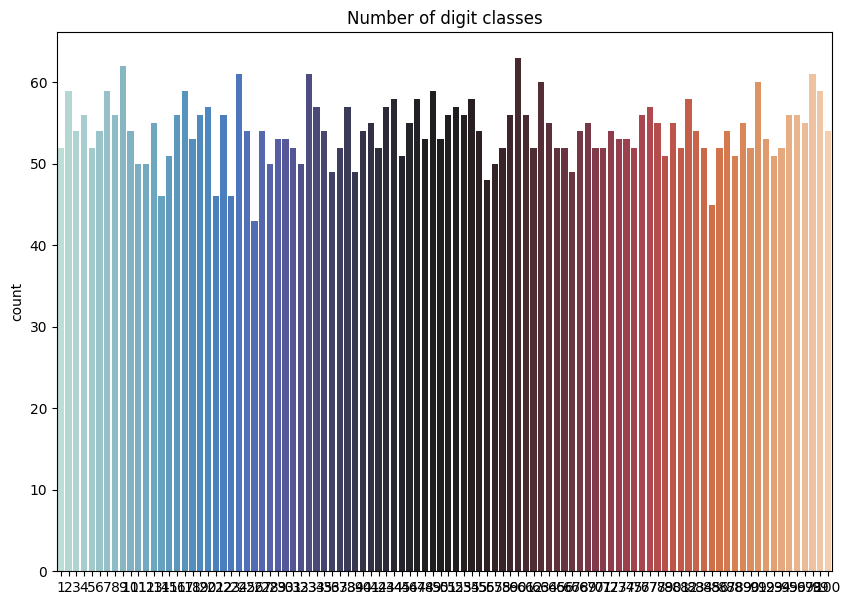

In [6]:
# visualize number of digits classes
plt.figure(figsize=(10,7))
sns.countplot(x=y_train, palette="icefire")
plt.title("Number of digit classes")
# Instead of y_train.value_counts(), use np.unique with bincount to get counts
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts))) # Print the unique values and their counts

# Plot some samples

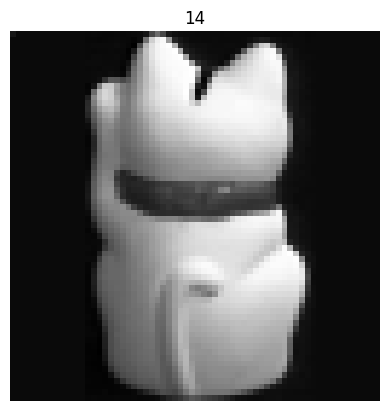

In [7]:
# plot some samples
img = x_train[10]
img = img.reshape((64,64))
plt.imshow(img,cmap='gray')
plt.title(y_train[10])
plt.axis("off")
plt.show()

# Reshape the images (if necessary, e.g., for Logistic Regression)

In [8]:
# Reshape the images (if necessary, e.g., for Logistic Regression)
x_train = x_train.reshape(-1, 64 * 64)  # Flatten to 1D vector
x_test = x_test.reshape(-1, 64 * 64)    # Flatten to 1D vector

# Train Logistic Regression

In [9]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=500)# Create Object Of Model
log_reg.fit(x_train, y_train) # Train Model
y_pred_logistic = log_reg.predict(x_test) #Predict the Test Data
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)# Calculate Accuracy
# Print Results
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")

Logistic Regression Accuracy: 0.96


# Train k-NN

In [10]:
# Train k-NN
knn = KNeighborsClassifier(n_neighbors=5) #take Object Of Model
knn.fit(x_train, y_train) # Train Model
y_pred_knn = knn.predict(x_test)# Predict the Test data
accuracy_knn = accuracy_score(y_test, y_pred_knn)# Claculate The Accuracy
# Print Results
print(f"k-NN Accuracy: {accuracy_knn:.2f}")

k-NN Accuracy: 0.92


# Accuracy For Models

In [11]:
# Accuracy For Models
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")
print(f"KNN Accuracy: {accuracy_knn:.2f}")

Logistic Regression Accuracy: 0.96
KNN Accuracy: 0.92


# Confusion Matrix for Logistic Regression

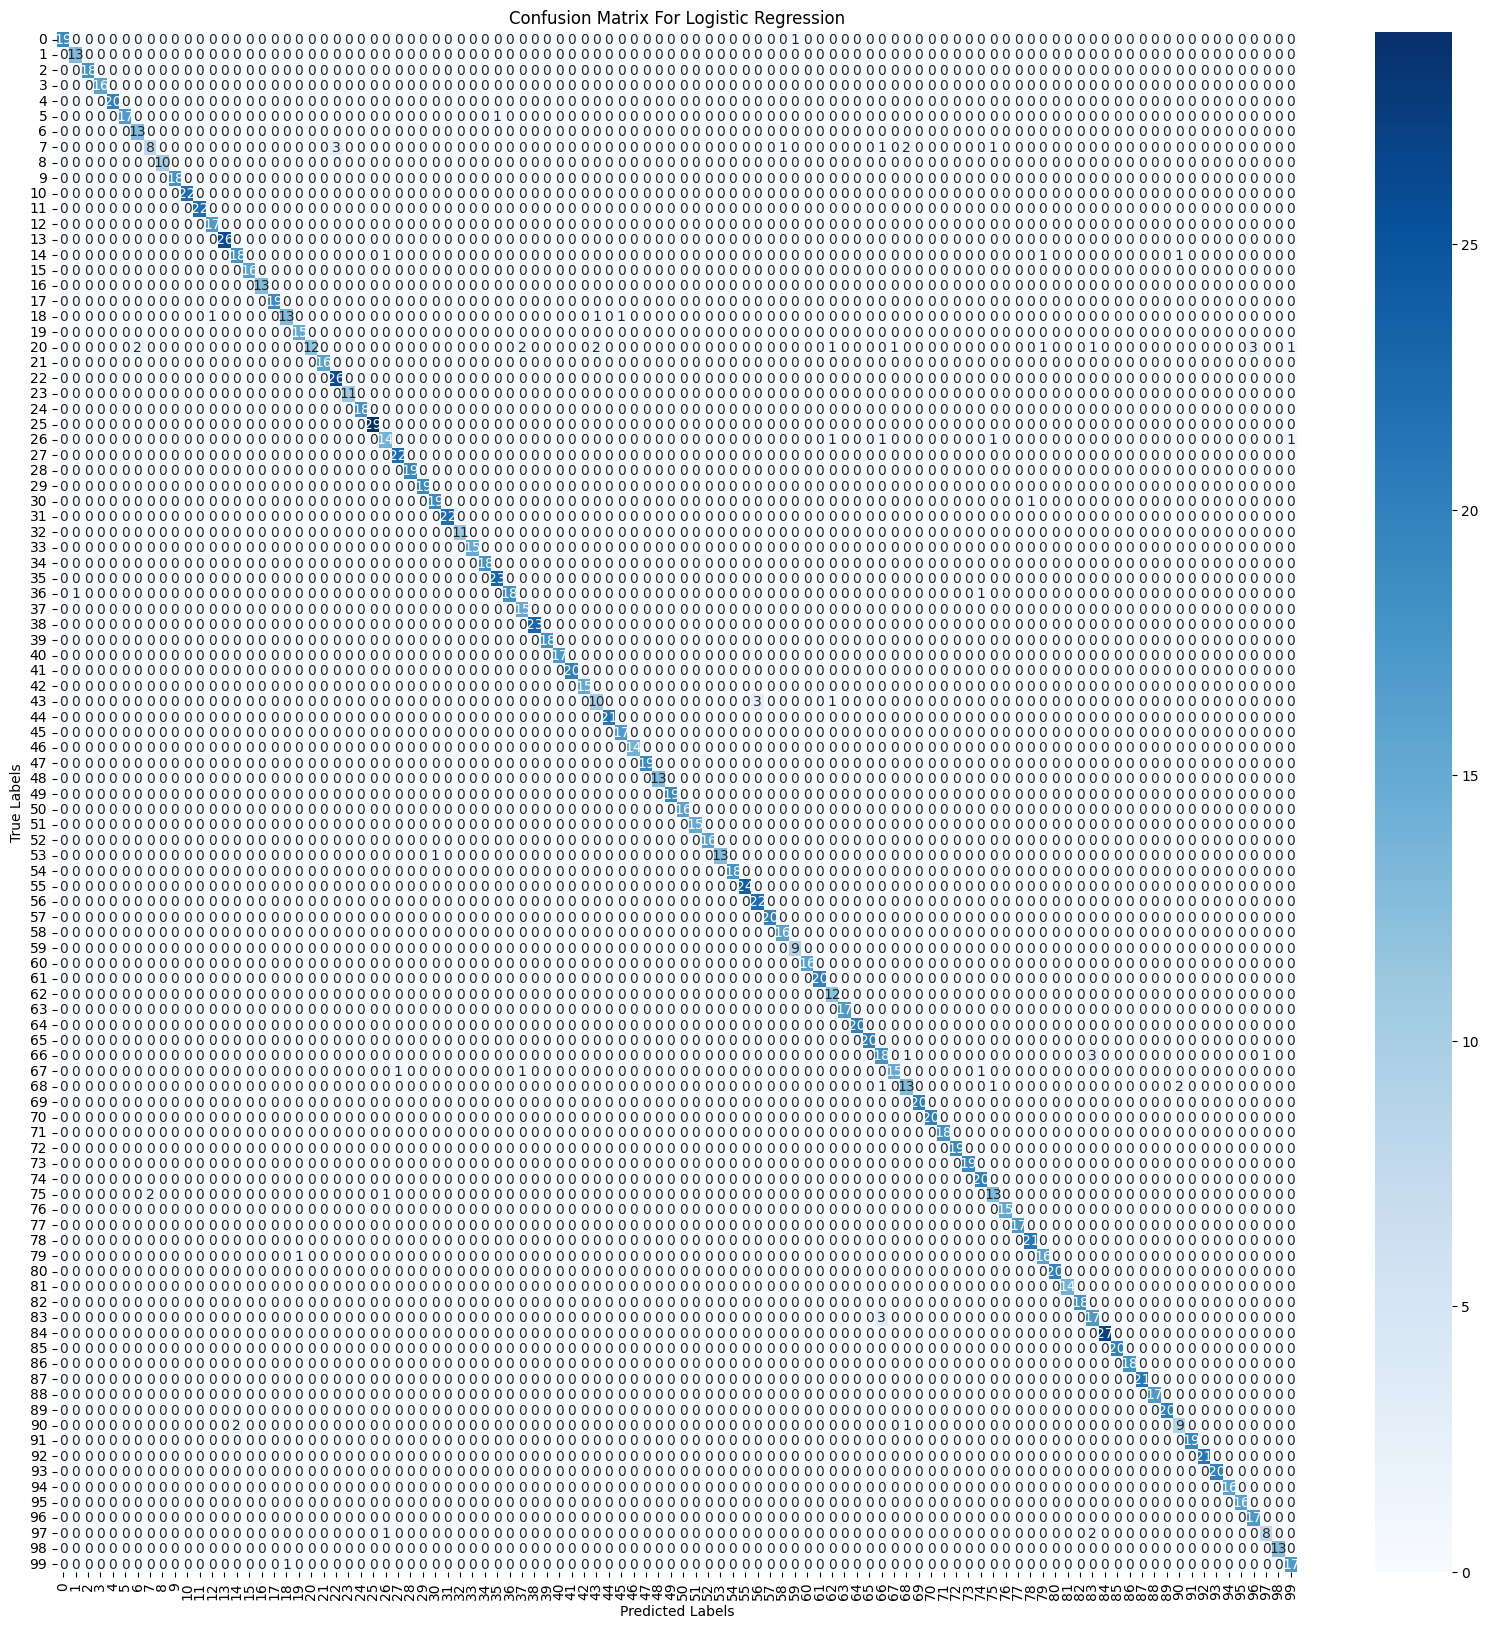

In [12]:
# Confusion Matrix for Logistic Regression
# Assuming you have already trained the model and predicted on test data
# y_test = true labels, y_pred = predicted labels

# Compute the confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plot the confusion matrix
plt.figure(figsize=(20, 20))  # Set the size of the plot
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(100), yticklabels=np.arange(100))

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Logistic Regression')
plt.show()

# Confusion Matrix for KNN

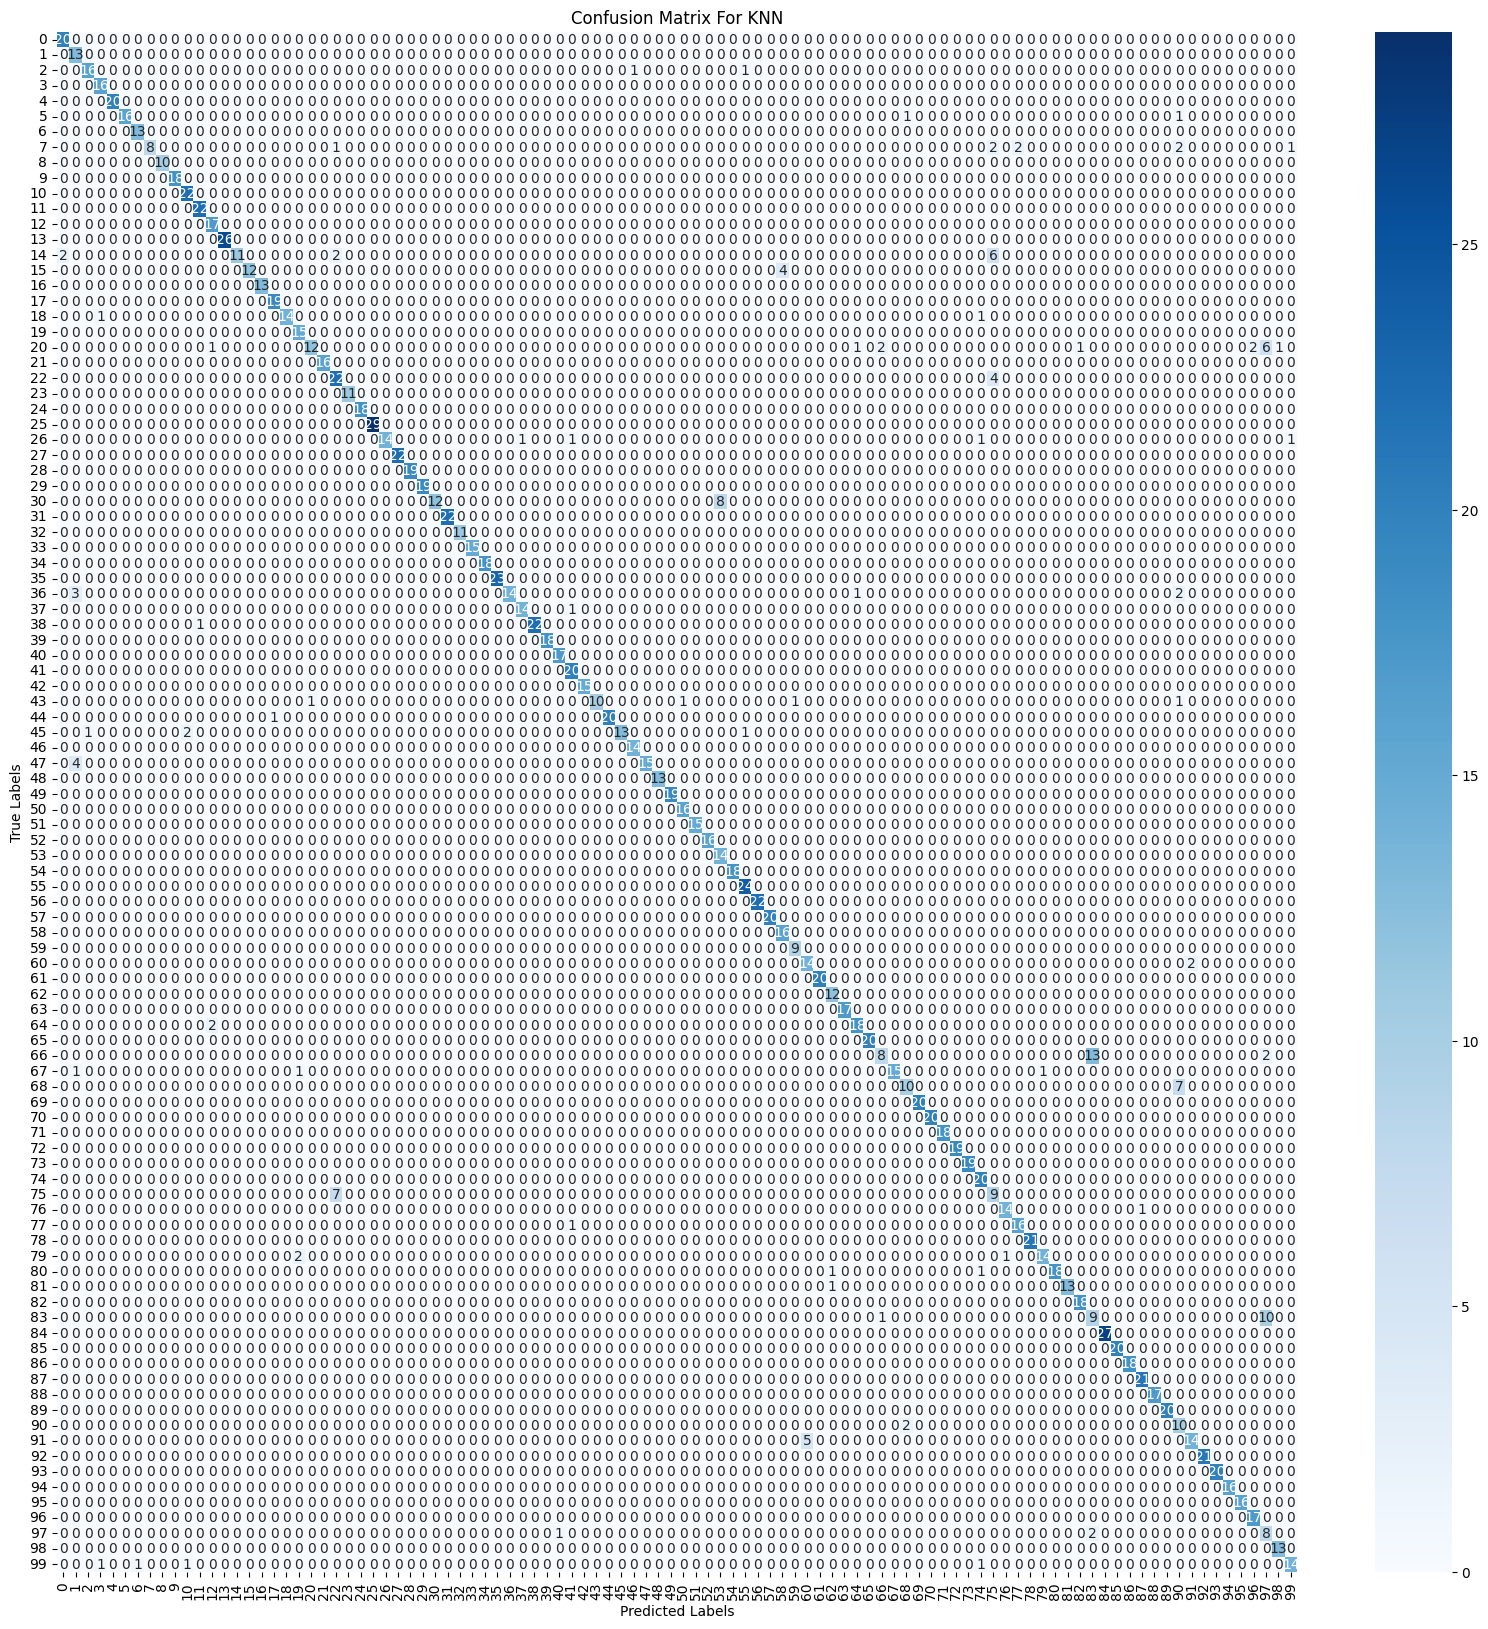

In [13]:
# Confusion Matrix for KNN
# Assuming you have already trained the model and predicted on test data
# y_test = true labels, y_pred = predicted labels

# Compute the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(20, 20))  # Set the size of the plot
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(100), yticklabels=np.arange(100))

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For KNN')
plt.show()

# Precision and Recall

In [14]:
# Precision and Recall
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')

precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

print(f"Logistic Regression Precision: {precision_logistic:.2f}")
print(f"KNN Precision: {precision_knn:.2f}")
print(f"Logistic Regression Recall: {recall_logistic:.2f}")
print(f"KNN Recall: {recall_knn:.2f}")

Logistic Regression Precision: 0.96
KNN Precision: 0.93
Logistic Regression Recall: 0.96
KNN Recall: 0.92


# Accuracy comparison plot

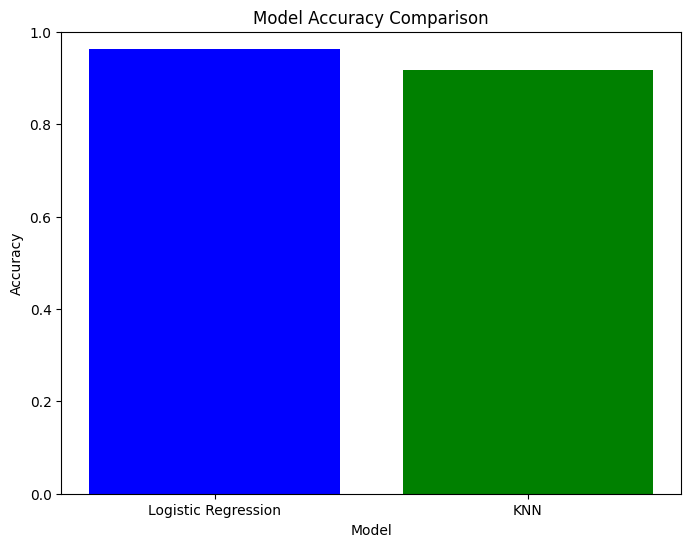

In [15]:
# Accuracy comparison plot
models = ['Logistic Regression', 'KNN']
accuracies = [accuracy_logistic, accuracy_knn]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])
plt.show()

# ROC Curve and AUC for Logistic Regression (Multi-class)

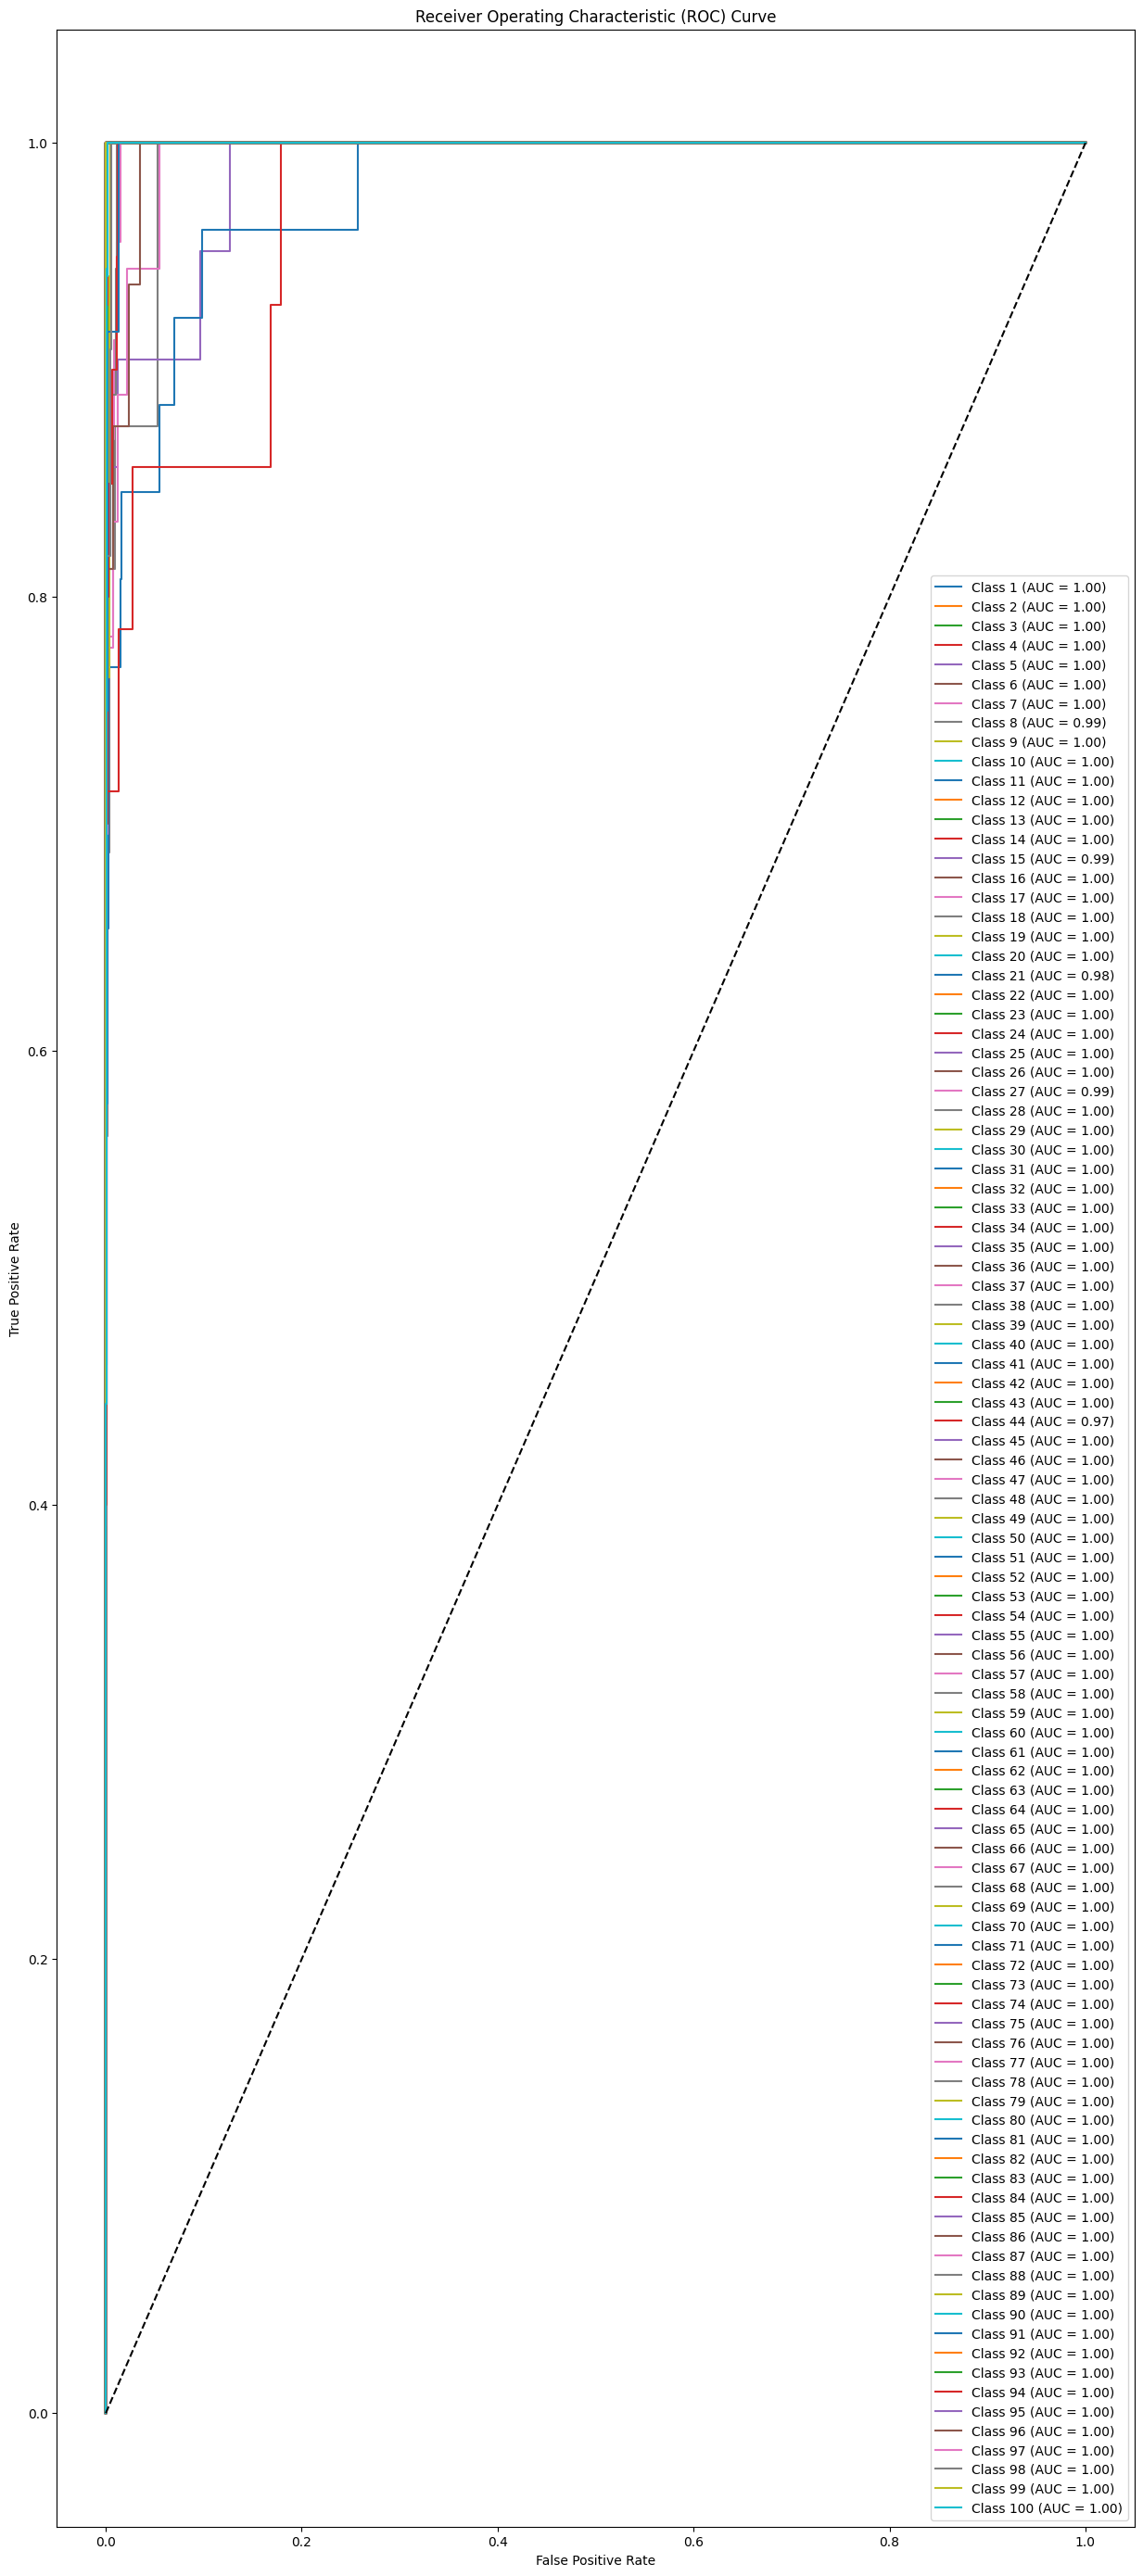

In [16]:
# ROC Curve and AUC for Logistic Regression (Multi-class)
fpr_logistic, tpr_logistic, roc_auc_logistic = {}, {}, {}

# Get the predicted probabilities for each class
log_reg_proba = log_reg.predict_proba(x_test)
# Iterate over each class (multi-class classification)
for i in range(1,log_reg_proba.shape[1]+1):  # Number of classes
    fpr_logistic[i-1], tpr_logistic[i-1], _ = roc_curve(y_test == i, log_reg_proba[:, i-1])  # One-vs-rest for each class
    roc_auc_logistic[i] = auc(fpr_logistic[i-1], tpr_logistic[i-1])

# Plot ROC Curves for Logistic Regression
plt.figure(figsize=(15, 35))
for i in range(1,len(roc_auc_logistic)+1):
    plt.plot(fpr_logistic[i-1], tpr_logistic[i-1], label=f'Class {i} (AUC = {roc_auc_logistic[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

# ROC Curve and AUC for KNN

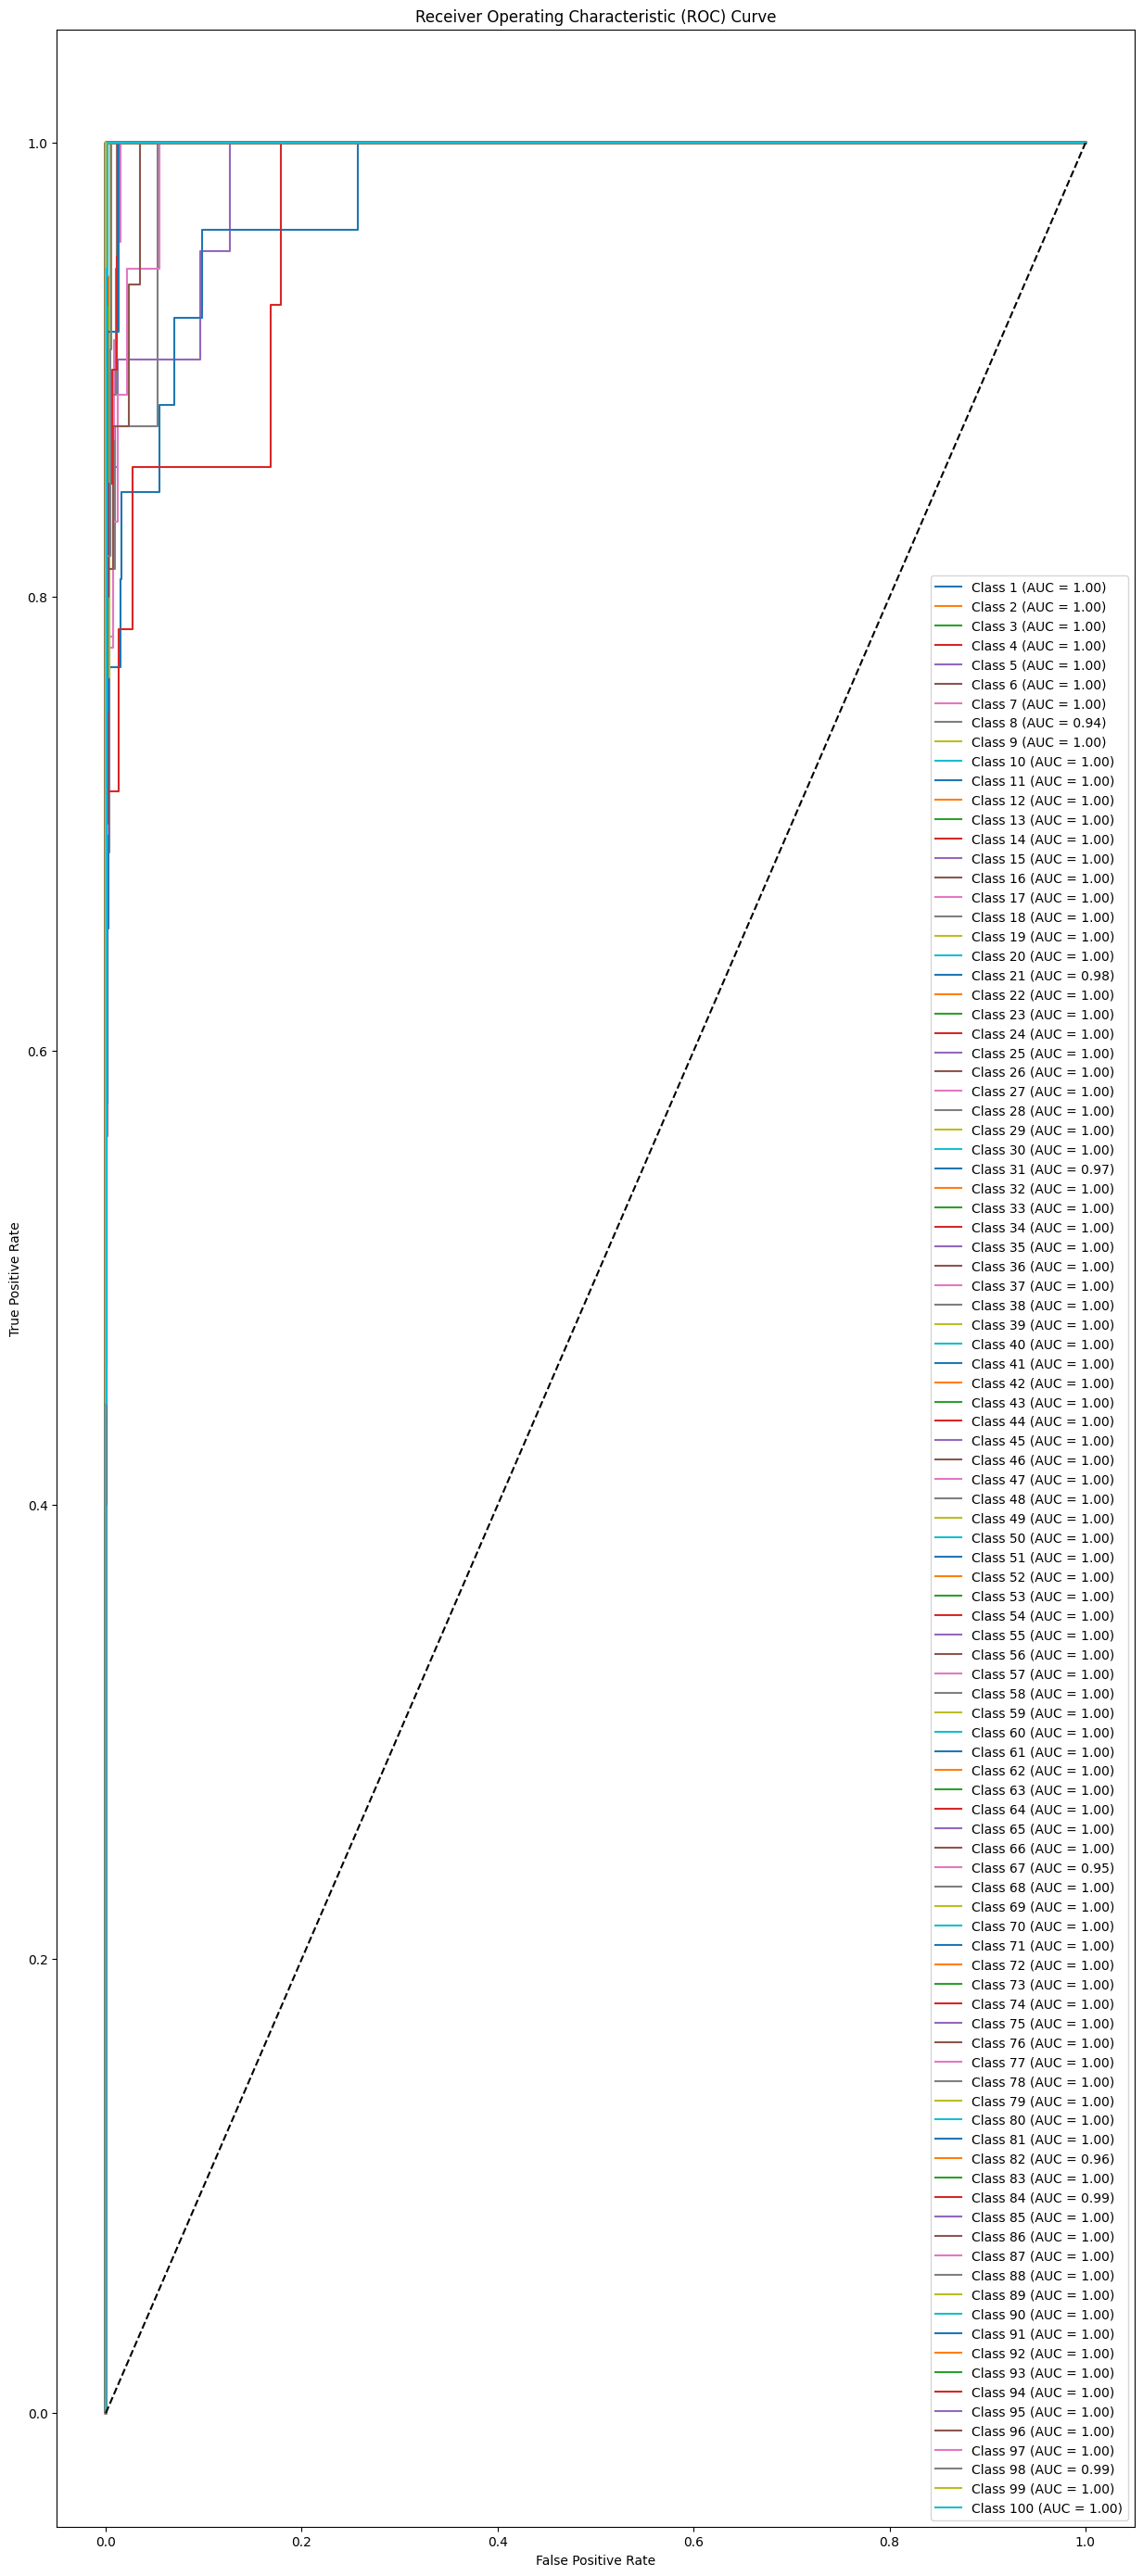

In [17]:
# ROC Curve and AUC for KNN
fpr_knn, tpr_knn, roc_auc_knn = {}, {}, {}

# Get the predicted probabilities for each class
knn_proba = knn.predict_proba(x_test)
# Iterate over each class (multi-class classification)
for i in range(1,knn_proba.shape[1]+1):  # Number of classes
    fpr_knn[i-1], tpr_knn[i-1], _ = roc_curve(y_test == i, knn_proba[:, i-1])  # One-vs-rest for each class
    roc_auc_knn[i] = auc(fpr_knn[i-1], tpr_knn[i-1])

# Plot ROC Curves for Logistic Regression
plt.figure(figsize=(15, 35))
for i in range(1,len(roc_auc_knn)+1):
    plt.plot(fpr_logistic[i-1], tpr_logistic[i-1], label=f'Class {i} (AUC = {roc_auc_knn[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

# Logistic Regression Loss Value

In [18]:
# Logistic Regression Loss Value
log_reg_proba = log_reg.predict_proba(x_test)

# Compute Log Loss
loss_logistic = log_loss(y_test, log_reg_proba)
print(f"Log Loss: {loss_logistic}")


Log Loss: 0.2621695945234031


# KNN Loss Value

In [19]:
# KNN Loss Value
knn_proba = knn.predict_proba(x_test)

# Calculate Log Loss
loss_knn = log_loss(y_test, knn_proba)
print(f"Log Loss for KNN: {loss_knn}")

Log Loss for KNN: 0.3107162231160261


# Logistic Regression some samples with predict and actual

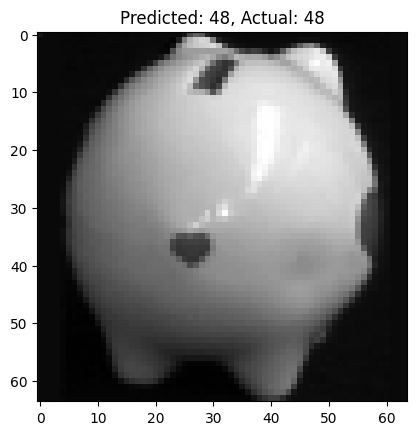

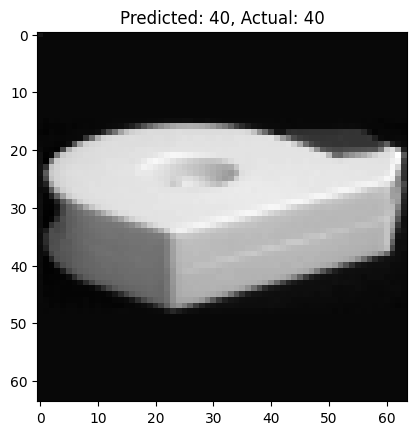

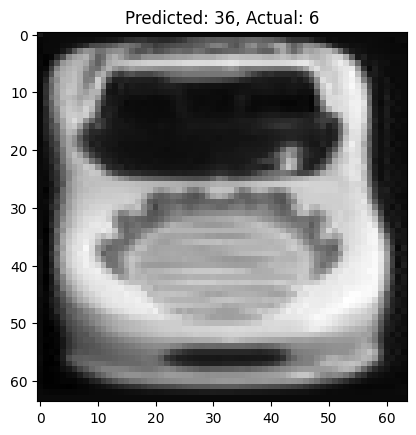

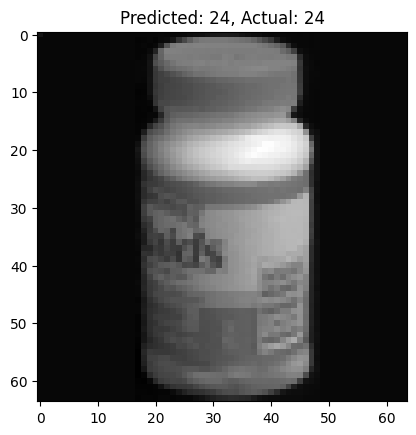

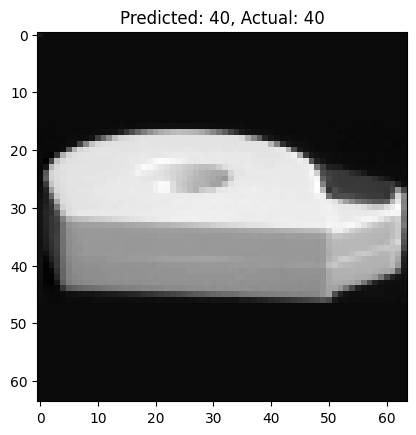

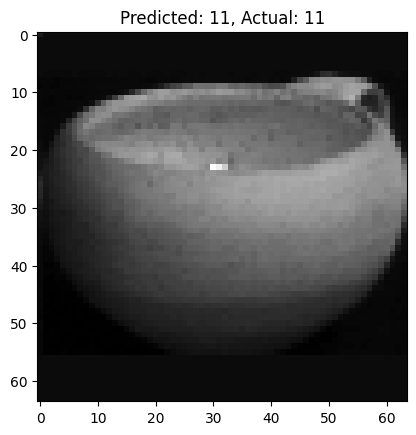

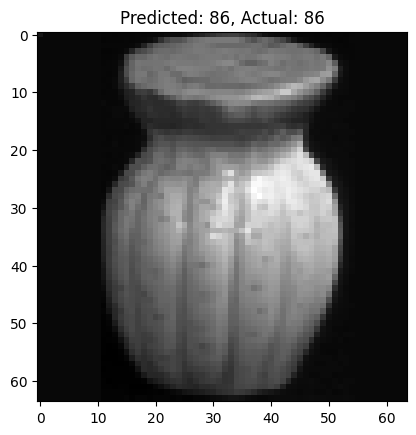

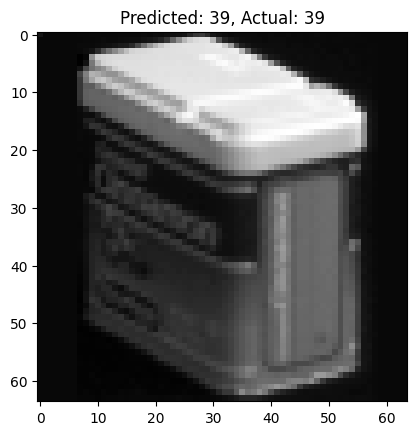

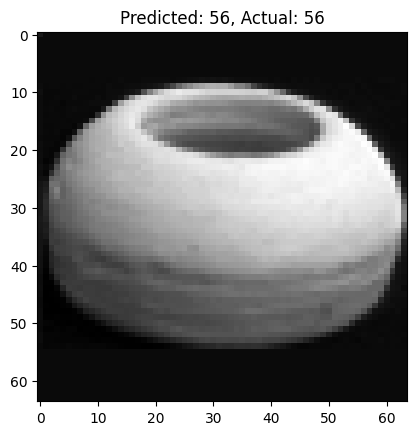

In [20]:
# Logistic Regression some samples with predict and actual
for i in range(9):
    plt.imshow(x_test[i].reshape(64, 64), cmap='gray')
    plt.title(f'Predicted: {y_pred_logistic[i]}, Actual: {y_test[i]}')
    plt.show()

# KNN some samples with predict and actual

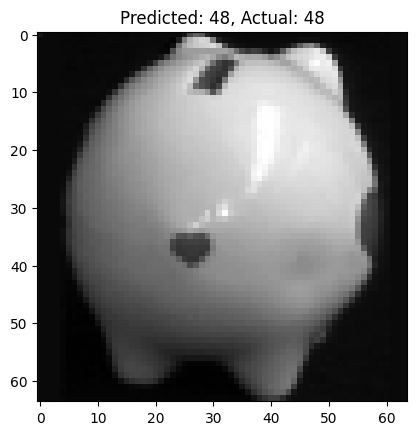

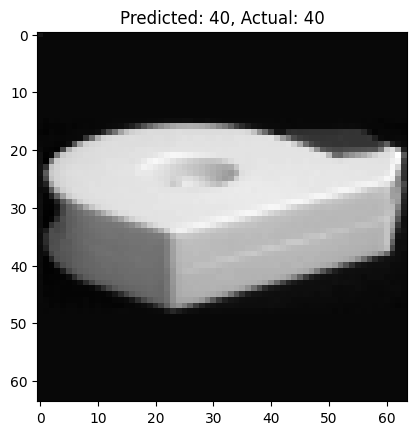

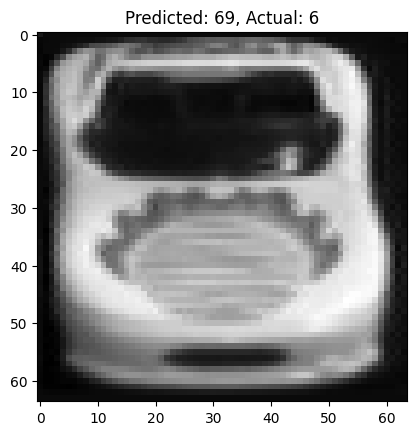

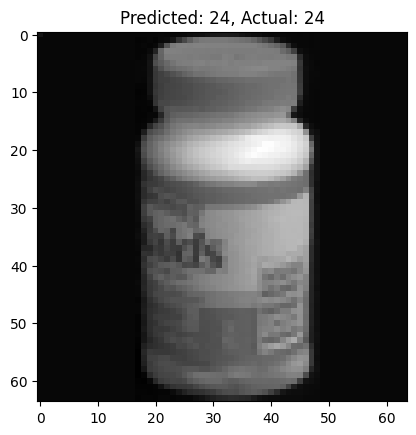

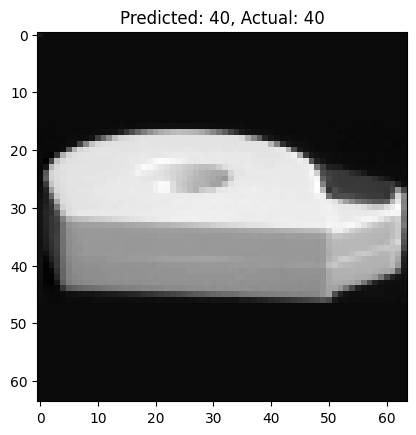

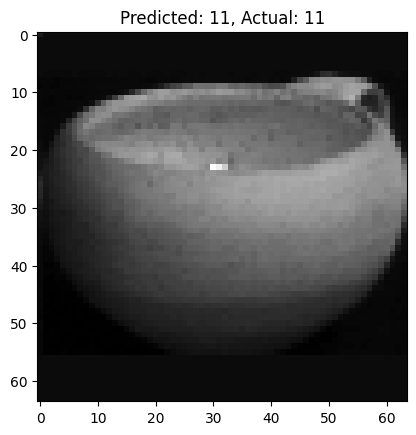

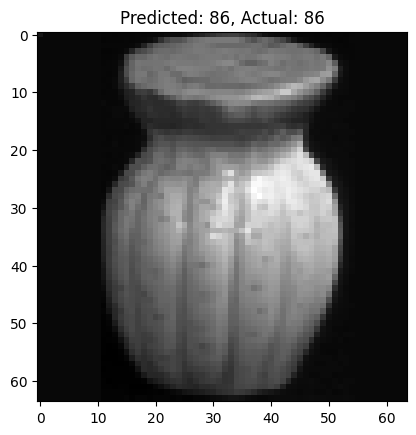

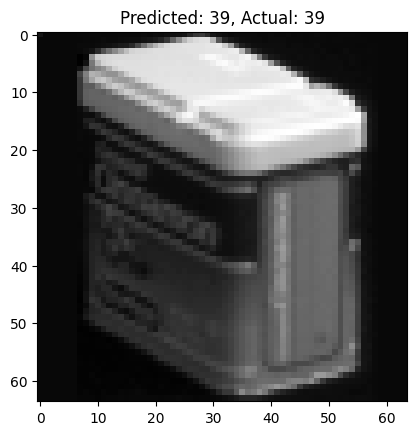

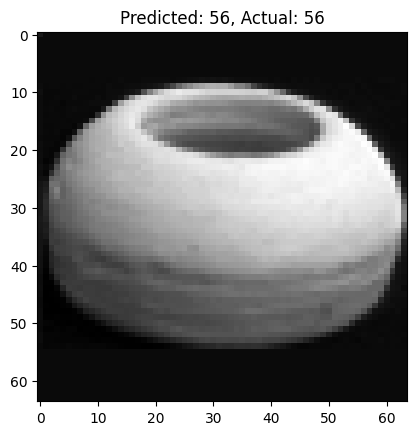

In [21]:
# KNN some samples with predict and actual
for i in range(9):
    plt.imshow(x_test[i].reshape(64, 64), cmap='gray')
    plt.title(f'Predicted: {y_pred_knn[i]}, Actual: {y_test[i]}')
    plt.show()